In [24]:
import os
import urllib
import tarfile
from yapf.yapflib.yapf_api import FormatCode

In [25]:
# pip install yapf

**In this project, Download a single compressed file, housing.tgz, which contains a comma-separated values (CSV) file called housing.csv with all the data**

**You could use your web browser to download the file and run tar xzf housing.tgz to decompress it and extract the CSV file, but it is preferable to create a small function to do that. Having a function that downloads the data is useful in particular if the data changes regularly: you can write a small script that uses the function to fetch the latest data (or you can set up a scheduled job to do that automatically at regular intervals). Automating the process of fetching the data is also useful if you need to install the dataset on multiple machine**

In [26]:
os.chdir(r"D:\Data Science\Practise\HousingData_TextBook")

DOWNLOAD_ROOT = "https://github.com/ageron/handson-ml2/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.trz"


def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.trz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.exractall(path=housing_path)
    housing_tgz.close()

In [27]:
import pandas as pd
import numpy as np

In [28]:
house = pd.read_csv(
    "D:\\Data Science\\Practise\\HousingData_TextBook\\datasets\\housing\\housing.csv"
)

In [29]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15615.000000,15615.000000,15615.000000,15615.000000,15464.000000,15615.000000,15615.000000,15615.000000,15615.000000
mean,-118.965894,35.105251,28.640090,2663.157349,547.463981,1452.253730,506.173679,3.811276,198971.023439
std,1.840731,2.048048,12.425557,2294.768133,442.548460,1181.581551,398.914113,1.885333,111025.403713
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-120.100000,33.850000,18.000000,1438.000000,296.000000,794.000000,279.000000,2.519200,118100.000000
50%,-118.270000,34.080000,29.000000,2107.000000,436.000000,1173.000000,409.000000,3.470600,171400.000000
75%,-117.860000,36.830000,37.000000,3133.500000,651.000000,1749.000000,605.500000,4.669800,246400.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [30]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15615 entries, 0 to 15614
Data columns (total 10 columns):
longitude             15615 non-null float64
latitude              15615 non-null float64
housing_median_age    15615 non-null int64
total_rooms           15615 non-null int64
total_bedrooms        15464 non-null float64
population            15615 non-null int64
households            15615 non-null int64
median_income         15615 non-null float64
median_house_value    15615 non-null int64
ocean_proximity       15615 non-null object
dtypes: float64(4), int64(5), object(1)
memory usage: 1.2+ MB


In [31]:
house['ocean_proximity'].value_counts()

1H OCEAN      7525
INLAND        4946
NEAR OCEAN    1651
NEAR BAY      1488
ISLAND           5
Name: ocean_proximity, dtype: int64

In [32]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [33]:
house.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15610,-116.87,32.72,13,3268,491.0,1431,503,5.7652,259900,1H OCEAN
15611,-116.89,32.67,9,2652,393.0,1355,362,6.2578,293100,1H OCEAN
15612,-116.76,32.74,14,4085,751.0,2129,688,4.7367,214500,1H OCEAN
15613,-116.79,32.61,19,2652,520.0,1421,491,3.5227,206100,1H OCEAN
15614,-122.41,37.81,25,1178,545.0,592,441,3.6728,500001,NEAR BAY


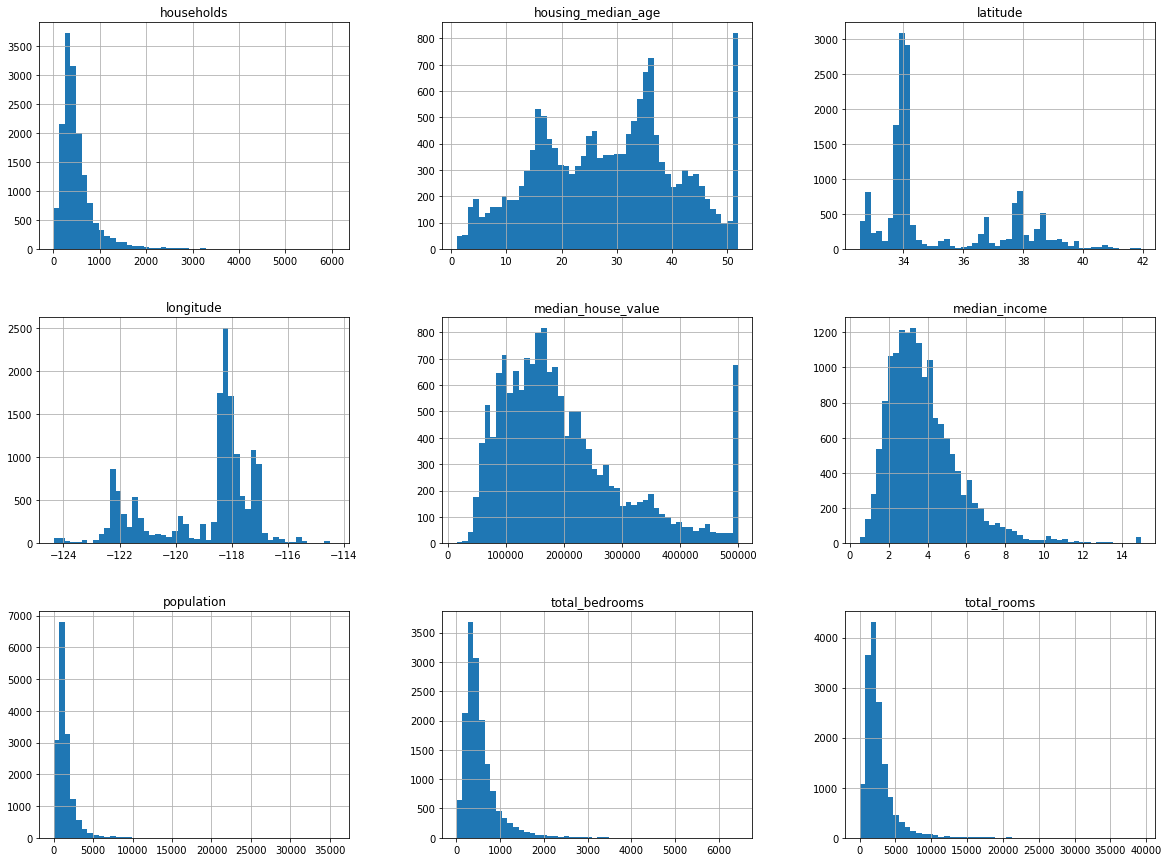

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
house.hist(bins=50, figsize=(20, 15))
plt.show()

In [36]:
# To make notebook ouput identical
np.random.seed(42)

In [37]:
# Function for train test split. sklearn has inbuilt train_test_split


def split_train_test(dataset, split_Ratio):
    shuffled_indices = np.random.permutation(len(dataset))
    test_set_size = int(len(dataset) * split_Ratio)
    test_set_indices = shuffled_indices[:test_set_size]
    train_set_indices = shuffled_indices[test_set_size:]
    return dataset.iloc[train_set_indices], dataset.iloc[test_set_indices]

In [38]:
train_set, test_set = split_train_test(house, 0.2)

In [39]:
print('Train Set Size is ', len(train_set), ' Test Set Size is ',
      len(test_set))

Train Set Size is  12492  Test Set Size is  3123


In [40]:
# Adding Id column to dataset
housing_id = house.reset_index()
housing_id.head(5)

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [41]:
# split dataset to train and test using sklearn function

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(house, test_size=0.2, random_state=42)

In [42]:
len(train_set)

12492

* __In some cases some of the variables are very important from business perspective. It is important to split train and test so that train and test represents all category of categorical attributes__

* __ In this data set, median Income is very important and should represent all the values in both train and test and we  need to ensure it is distributed equally. Since it is continuous variable, we first convert Convert median Income to category by using Binning and then use sampling__


In [43]:
house['income_cat'] = pd.cut(house['median_income'],
                             bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                             labels=[1, 2, 3, 4, 5])

In [44]:
house.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,5
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,5
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,5
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,4
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,3


In [45]:
house['income_cat'].value_counts()

3    5451
2    5167
4    2603
5    1733
1     661
Name: income_cat, dtype: int64

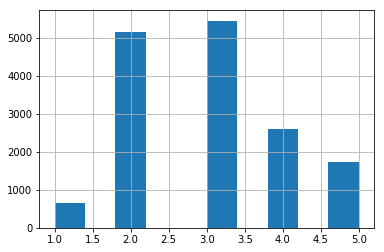

In [46]:
house['income_cat'].hist()

* In some cases some of the variables are very important from business perspective. It is important to split train and test so that train and test represents all category of categorical attributes.
We use __Stratified sampling__ to do this

* sklearn has __StratifiedShuffleSplit__ to do this

In [49]:
from sklearn.model_selection import StratifiedShuffleSplit

stsplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in stsplit.split(house, house['income_cat']):
    st_train_set = house.loc[train_index]
    st_test_set = house.loc[test_index]

In [50]:
st_train_set['income_cat'].value_counts()

3    4361
2    4134
4    2082
5    1386
1     529
Name: income_cat, dtype: int64

In [51]:
st_test_set['income_cat'].value_counts()

3    1090
2    1033
4     521
5     347
1     132
Name: income_cat, dtype: int64

* Now we have ensured __median_income__ is equally samplted in both train and test. We can remove __income_cat__ from data set 

In [52]:
for set_ in [st_train_set, st_test_set]:
    set_.drop("income_cat", axis=1, inplace=True)

In [53]:
st_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4229,-118.29,34.11,49,2850,379.0,1113,380,12.9591,500001,1H OCEAN
5351,-118.40,34.04,40,2079,268.0,720,282,9.2720,500001,1H OCEAN
3555,-118.59,34.23,17,6592,1525.0,4459,1463,3.0347,254500,1H OCEAN
7704,-118.14,33.96,34,2744,541.0,1333,503,4.0536,277200,1H OCEAN
15184,-117.10,32.97,17,3167,861.0,2098,828,2.4459,85800,1H OCEAN


## `Discover and Visualize the Data to Gain Insights

In [54]:
housing = st_train_set.copy()

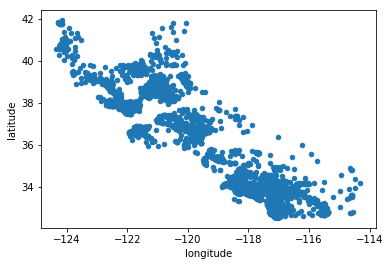

In [55]:
housing.plot(kind="scatter", x="longitude", y="latitude")

* To visualize where high density points are available, Set alpha = 0.1

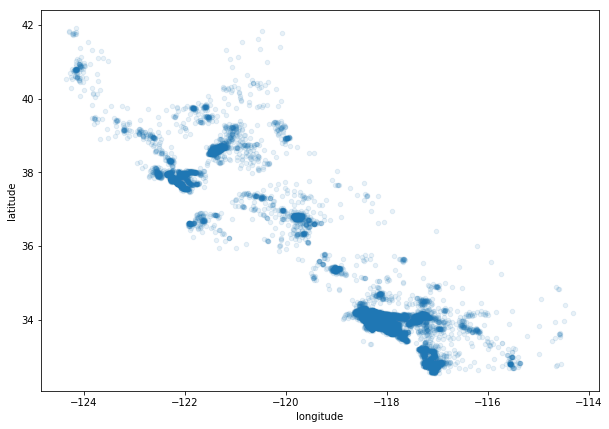

In [56]:
housing.plot(kind="scatter",
             x="longitude",
             y="latitude",
             alpha=0.1,
             figsize=(10, 7))

* Now let’s look at the housing prices. The radius of each circle represents the district’s population (option s), and the color represents the price (option c). We will use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices):

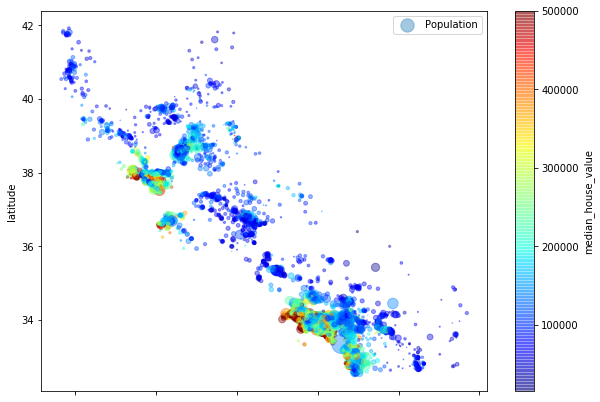

In [57]:
housing.plot(kind="scatter",
             x="longitude",
             y="latitude",
             alpha=0.4,
             s=housing['population'] / 100,
             label="Population",
             figsize=(10, 7),
             c="median_house_value",
             cmap=plt.get_cmap("jet"),
             colorbar=True)
plt.legend()

### Correlation Matrix

In [58]:
corr_matrix = housing.corr()

In [59]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.695431
total_rooms           0.137171
longitude             0.081094
housing_median_age    0.069333
households            0.064357
total_bedrooms        0.047531
population           -0.024807
latitude             -0.227492
Name: median_house_value, dtype: float64

## Creating new features from the existing datashet

In [60]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['beedrooms_per_household'] = housing['total_bedrooms'] / housing[
    'households']
housing[
    'population_per_household'] = housing['population'] / housing['households']

In [61]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.695431
rooms_per_household         0.143134
total_rooms                 0.137171
longitude                   0.081094
housing_median_age          0.069333
households                  0.064357
total_bedrooms              0.047531
population                 -0.024807
beedrooms_per_household    -0.037140
population_per_household   -0.044632
latitude                   -0.227492
Name: median_house_value, dtype: float64

## Prepare data for Machine learning algorithm

In [62]:
housing = st_train_set.drop("median_house_value", axis=1)
housing_labels = st_train_set['median_house_value']

### Data Cleaning

In [63]:
# Handing missing Values
from sklearn.impute import SimpleImputer

# FInd count of missing values

In [64]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        127
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [65]:
imputer = SimpleImputer(strategy="median")

In [66]:
# Median works only only on Numerical attributes, So we will remove the categorical attribute to apply on numerical
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [67]:
imputer.statistics_

array([-118.27   ,   34.07   ,   29.     , 2101.     ,  434.     ,
       1171.     ,  408.     ,    3.46835])

In [68]:
housing_num.median().values

array([-118.27   ,   34.07   ,   29.     , 2101.     ,  434.     ,
       1171.     ,  408.     ,    3.46835])

In [69]:
X = imputer.transform(housing_num)

In [70]:
house_tr = pd.DataFrame(X,
                        columns=housing_num.columns,
                        index=housing_num.index)

### Handling Text and Categorical attributes

In [81]:
from sklearn.preprocessing import OrdinalEncoder
housing_cat = housing[['ocean_proximity']]

In [82]:
ordinal_encoder = OrdinalEncoder()

In [83]:
housing_cat.head(10)

,ocean_proximity
4229,1H OCEAN
5351,1H OCEAN
3555,1H OCEAN
7704,1H OCEAN
15184,1H OCEAN
12145,1H OCEAN
3456,1H OCEAN
13961,INLAND
6685,INLAND
5924,INLAND


In [84]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [85]:
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.]])

* __This will encode categories to numbers, however the problem with this kind of encoding is ML alg will consider 1 and 1 as close to each other and o and 4 as distant because of the numbers assigned to the category. This is not the case in this category. So we use oneHotEncoding__

In [86]:
ordinal_encoder.categories_

[array(['1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [87]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housingCat_enc = cat_encoder.fit_transform(housing_cat)

In [89]:
housingCat_enc

<12492x5 sparse matrix of type '<class 'numpy.float64'>'
	with 12492 stored elements in Compressed Sparse Row format>

In [90]:
housingCat_enc.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

### Custom Transformers

* Although Scikit-Learn provides many useful transformers, you will need to write your own for tasks such as custom cleanup operations or combining specific attributes. You will want your transformer to work seamlessly with Scikit-Learn functionalities (such as pipelines), and since Scikit-Learn relies on duck typing (not inheritance), all you need to do is create a class and implement three methods: fit() (returning self), transform(), and fit_transform().

* You can get the last one for free by simply adding TransformerMixin as a base class. If you add BaseEstimator as a base class (and avoid *args and **kargs in your constructor), you will also get two extra methods (get_params() and set_params()) that will be useful for automatic hyperparameter tuning.

In [102]:
from sklearn.base import BaseEstimator, TransformerMixin

# Get Index of columns
room_ix, beedroom_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")
]

print(room_ix, beedroom_ix, population_ix, household_ix)


class CombinedAttributeAddr(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        room_per_house = X[:,room_ix] / X[:,household_ix]
        population_per_house = X[:,population_ix] / X[:,household_ix]

        if (self.add_bedrooms_per_room == True):
            beedroom_per_room = X[:,beedroom_ix] / X[:,room_ix]
            return np.c_[X, room_per_house, population_per_house,
                         beedroom_per_room]
        else:
            return np.c_[X, room_per_house, population_per_house]

3 4 5 6


* ** Alternatively we can use sklean Buildin FunctionTransformer**

In [105]:
from sklearn.preprocessing import FunctionTransformer


def create_new_features(X, add_bedroom=True):
    room_per_house = X[:, room_ix] / X[:, household_ix]
    population_per_house = X[:, population_ix] / X[:, household_ix]

    if (add_bedroom == True):
        beedroom_per_room = X[:, beedroom_ix] / X[:, room_ix]
        return np.c_[X, room_per_house, population_per_house,
                     beedroom_per_room]
    else:
        return np.c_[X, room_per_house, population_per_house]

In [106]:
attr_addr = FunctionTransformer(create_new_features,
                                validate=False,
                                kw_args={"add_bedroom": False})
housing_extra_attr = attr_addr.fit_transform(housing.values)

In [107]:
housing_extra = pd.DataFrame(
    housing_extra_attr,
    columns=list(housing.columns) +
    ["rooms_per_household", "population_per_household"],
    index=housing.index)

In [108]:
housing_extra.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
4229,-118.29,34.11,49,2850,379,1113,380,12.9591,1H OCEAN,7.5,2.92895
5351,-118.4,34.04,40,2079,268,720,282,9.272,1H OCEAN,7.37234,2.55319
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,1H OCEAN,4.50581,3.04785
7704,-118.14,33.96,34,2744,541,1333,503,4.0536,1H OCEAN,5.45527,2.6501
15184,-117.1,32.97,17,3167,861,2098,828,2.4459,1H OCEAN,3.82488,2.53382


### Feature Scaling

In [119]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
house_scaled = ss.fit_transform(housing_extra.drop("ocean_proximity", axis=1))
house_scaled_df = pd.DataFrame(house_scaled, columns = housecol)

In [120]:
print(house_col)
house_scaled_df.head(5)

None


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household
0,0.364627,-0.482637,1.638944,0.082816,-0.382457,-0.289869,-0.318297,4.845248,0.721571,-0.017362
1,0.304757,-0.516758,0.915472,-0.254836,-0.634308,-0.625892,-0.565820,2.891861,0.677112,-0.081739
2,0.201344,-0.424144,-0.933400,1.721590,2.217729,2.571030,2.417077,-0.412597,-0.321186,0.003008
3,0.446268,-0.555753,0.433158,0.036395,-0.014892,-0.101765,-0.007631,0.127206,0.009473,-0.065136
4,1.012315,-1.038320,-0.933400,0.221644,0.711164,0.552326,0.813233,-0.724537,-0.558326,-0.085058


### Pipleline to build data preprocessing

In [124]:
from sklearn.pipeline import Pipeline

num_pipleine = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('add_extra_param', FunctionTransformer(create_new_features, validate=False)),
    ('scaling', StandardScaler())
])

housing_num_tr = num_pipleine.fit_transform(housing_num)

In [126]:
print(housing_num_tr)

[[ 0.364627   -0.48263722  1.63894447 ...  0.72157085 -0.01736242
  -1.22898756]
 [ 0.30475664 -0.51675812  0.91547249 ...  0.67711214 -0.08173881
  -1.28912907]
 [ 0.20134421 -0.42414425 -0.93340034 ... -0.32118555  0.00300804
   0.22289183]
 ...
 [ 0.9470023  -1.1016878  -0.77262879 ...  0.67018824  0.02102434
  -1.28853541]
 [ 0.63132223 -0.69223702 -1.89802965 ... -0.29504085 -0.02030624
   0.26730648]
 [-1.2192161   1.58898872 -1.17455767 ...  0.23303956  0.03684876
  -0.59727459]]


** We can use ColumnTransformer to create pipeline for both Numerical and categorical attributes**

In [152]:
from sklearn.compose import ColumnTransformer

num_attr = list(housing_num)
cat_attr = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ("num", num_pipleine, num_attr),
    ("cat", OneHotEncoder(), cat_attr)
])

housing_final = full_pipeline.fit_transform(housing)

In [153]:
print(housing_final.shape)

(12492, 16)


In [154]:
print(housing_final[1])

[ 0.30475664 -0.51675812  0.91547249 -0.25483586 -0.63470997 -0.62589237
 -0.56581951  2.89186058  0.67711214 -0.08173881 -1.28912907  1.
  0.          0.          0.          0.        ]


In [147]:
housing_final_df = pd.DataFrame(housing_final)

In [138]:
housing_final_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.364627,-0.482637,1.638944,0.082816,-0.381655,-0.289869,-0.318297,4.845248,0.721571,-0.017362,-1.228988,1.0,0.0,0.0,0.0,0.0
1,0.304757,-0.516758,0.915472,-0.254836,-0.634710,-0.625892,-0.565820,2.891861,0.677112,-0.081739,-1.289129,1.0,0.0,0.0,0.0,0.0
2,0.201344,-0.424144,-0.933400,1.721590,2.230969,2.571030,2.417077,-0.412597,-0.321186,0.003008,0.222892,1.0,0.0,0.0,0.0,0.0
3,0.446268,-0.555753,0.433158,0.036395,-0.012331,-0.101765,-0.007631,0.127206,0.009473,-0.065136,-0.281695,1.0,0.0,0.0,0.0,0.0
4,1.012315,-1.038320,-0.933400,0.221644,0.717198,0.552326,0.813233,-0.724537,-0.558326,-0.085058,0.821086,1.0,0.0,0.0,0.0,0.0


## Select and Train Model

### Training and evaluating on the training set

#### Linear Regression

In [140]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_final, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* Linear reegrssion is ready, Lets try on few instances

In [155]:
few_data = housing.iloc[:5]
few_label = housing_labels.iloc[:5]

preprocessed_data = full_pipeline.transform(few_data)
print("Predications-", lin_reg.predict(preprocessed_data))

print("Actual-", list(few_label))

Predications- [591961.00150904 445230.67560184 190163.49207692 238777.88845828
 177153.95689677]
Actual- [500001, 500001, 254500, 277200, 85800]


* **Measuring Regression model by using RMSE**

In [157]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_final)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print("RMSE-", lin_rmse)

RMSE- 66891.40793002324


#### Decision Tree Regressor

In [158]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_final, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [159]:
housing_pred_DT = tree_reg.predict(housing_final)
DT_mse = mean_squared_error(housing_labels, housing_pred_DT)
DT_rmse = np.sqrt(DT_mse)
print("RMSE of Decsion Tree is-", DT_rmse)

RMSE of Decsion Tree is- 0.0


* Its giving RMSE as 0, which means Decsion Treeis seriously overfitting the date. To avoind such cases we use cross_validation

In [161]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_final, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
print(tree_rmse_scores)

[67040.68958866 64778.52014019 66257.36010323 65070.73825817
 61991.30306682 66374.80139153 68733.42473833 65267.3358094
 66537.59878388 65733.42016213]


In [164]:
def dispay_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [166]:
dispay_scores(tree_rmse_scores)

Scores: [67040.68958866 64778.52014019 66257.36010323 65070.73825817
 61991.30306682 66374.80139153 68733.42473833 65267.3358094
 66537.59878388 65733.42016213]
Mean: 65778.5192042327
Standard deviation: 1661.110595666583


** Apply the same cross validation on Linear Regression model**

In [167]:
lin_scores = cross_val_score(lin_reg, housing_final, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_score = np.sqrt(-lin_scores)
dispay_scores(lin_rmse_score)

Scores: [70264.04794524 63639.94560719 65841.01942183 63937.65574981
 67314.62957347 65661.85565011 74479.80246996 66222.70576968
 69510.66701775 65384.45887099]
Mean: 67225.67880760286
Standard deviation: 3154.5289497803137


### Save the model

In [168]:
import joblib
joblib.dump(lin_reg, "LinearReg.pkl")
joblib.dump(tree_reg, "DecisionTree.pkl")

['DecisionTree.pkl']

In [169]:
# To load model
lin_reg_loaded = joblib.load("LinearReg.pkl")

In [171]:
# Predict from loaded Linear model
lin_reg_loaded.predict(housing_final)

array([591961.00150904, 445230.67560184, 190163.49207692, ...,
       366499.2458435 , 188043.71537426, 128442.58591872])

### Apply the model on testing set

In [174]:
x_test = st_test_set.drop('median_house_value', axis=1)
y_test = st_test_set['median_house_value'].copy()

x_test_processed = full_pipeline.transform(x_test)

test_predict = lin_reg.predict(x_test_processed)

final_mse = mean_squared_error(y_test, test_predict)
print(final_mse)
rmse = np.sqrt(final_mse)
print("RMSE-", rmse)

4388477952.10135
RMSE- 66245.58817084614
